In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
# Loading the dataset and displaying the first few rows of the dataset
file_path = 'prices.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


In [14]:
# Checking the shape and basic information of the dataset, and summary statistics 
print("Dataset shape:", data.shape)

data.info()

data.describe()


Dataset shape: (287, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


In [16]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
Series([], dtype: int64)


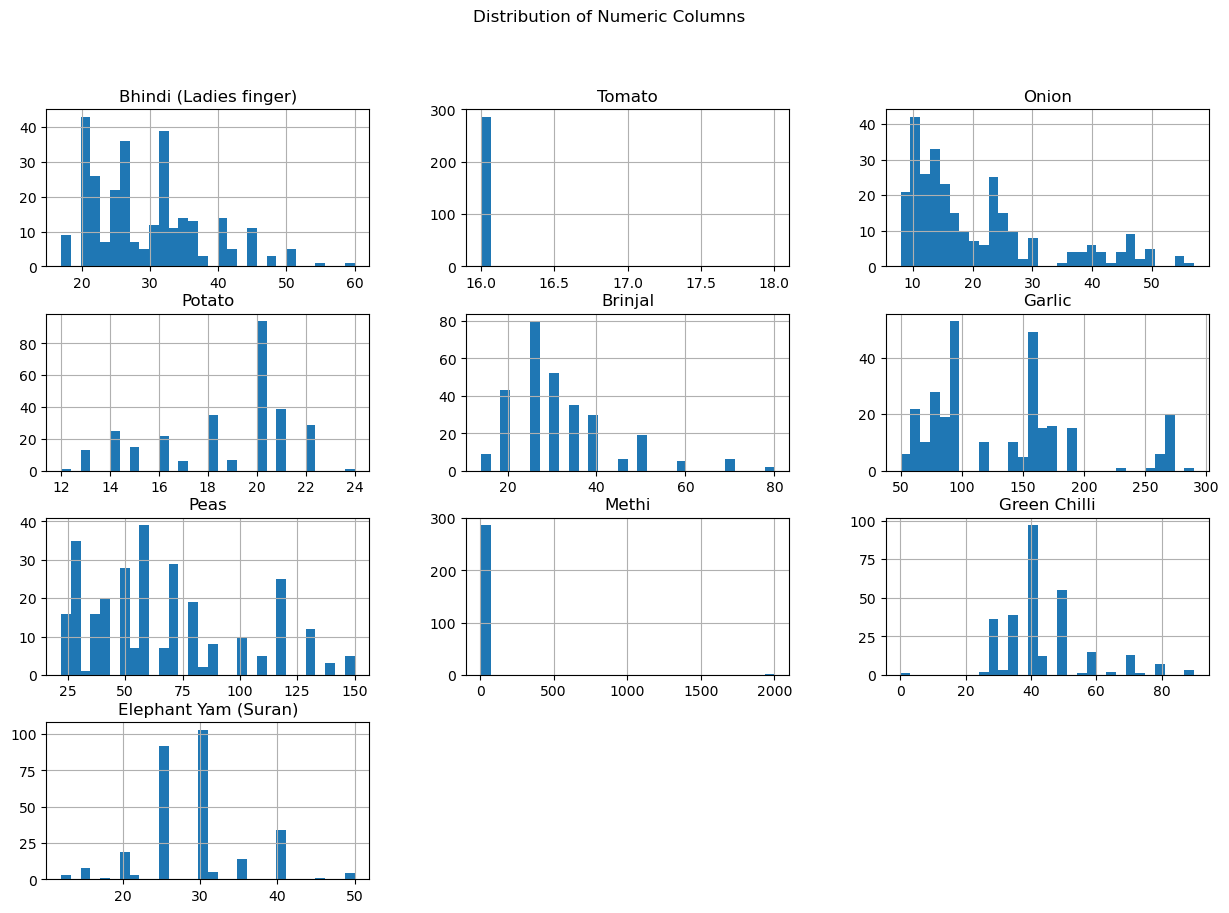

In [18]:
# Histogram for each numeric column
data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Columns")
plt.show()

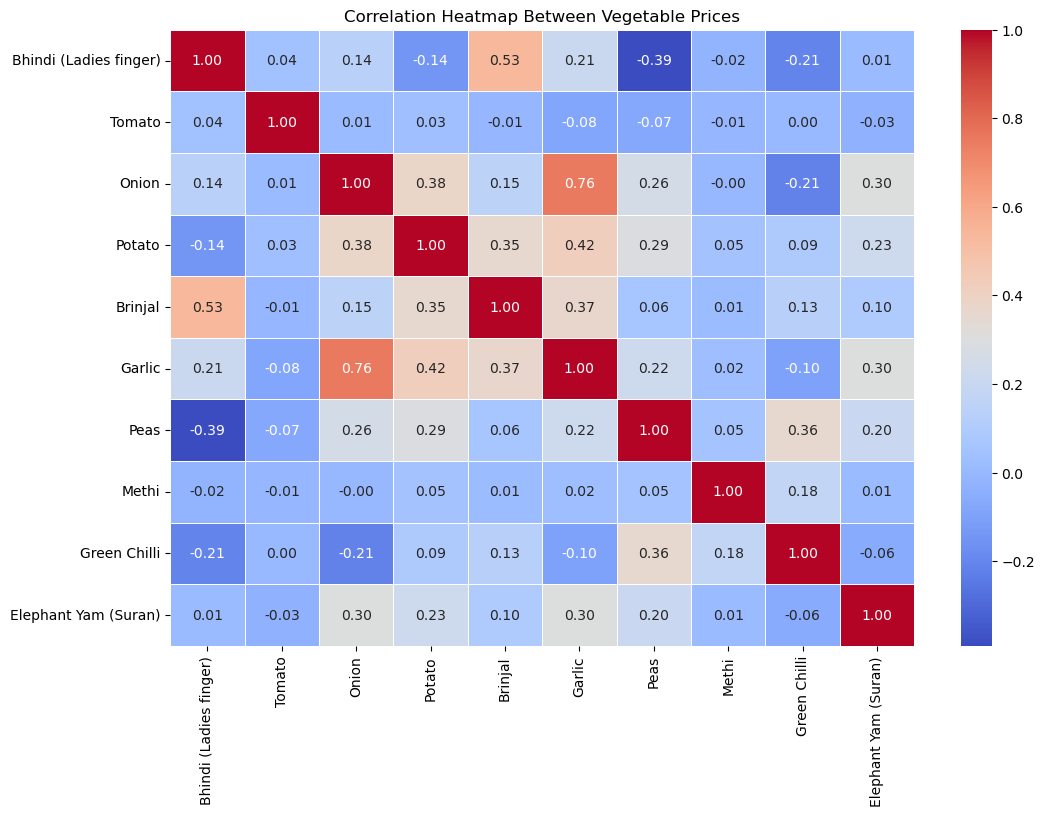

In [20]:
# Calculate the correlation matrix between vegetable prices
correlation_matrix = data[['Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato', 'Brinjal', 
                           'Garlic', 'Peas', 'Methi', 'Green Chilli', 'Elephant Yam (Suran)']].corr()

# Plotting a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Between Vegetable Prices')
plt.show()


<Figure size 1400x800 with 0 Axes>

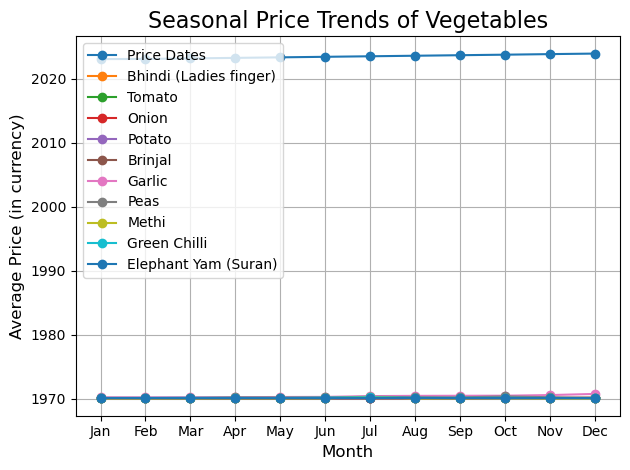

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'prices.csv' with the actual file path)
data = pd.read_csv('prices.csv')

# Convert 'Price Dates' to datetime if not already
data['Price Dates'] = pd.to_datetime(data['Price Dates'], format='%d-%m-%Y')

# Grouping by month and calculating the average price for each vegetable
monthly_prices = data.groupby(data['Price Dates'].dt.month).mean()

# Plotting the monthly price trends for each vegetable
plt.figure(figsize=(14, 8))
monthly_prices.plot(marker='o')
plt.title('Seasonal Price Trends of Vegetables', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price (in currency)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()  # Ensure everything fits properly
plt.show()


# What is the overall price trend for each vegetable over time?

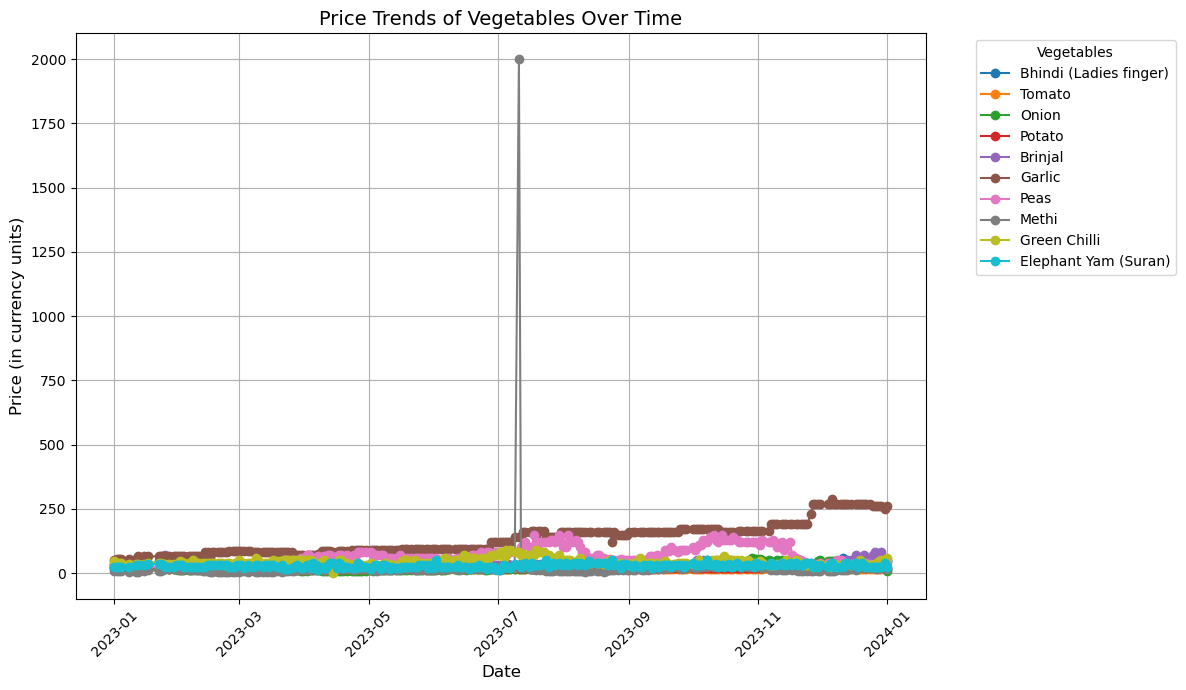

In [36]:
# Load the dataset from the CSV file
df = pd.read_csv('prices.csv')

# Convert 'Price Dates' column to datetime format
df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')

# Set 'Price Dates' as the index for easier plotting
df.set_index('Price Dates', inplace=True)

# Plot the price trends for each vegetable
plt.figure(figsize=(12, 7))

# Loop through each vegetable column and plot its price trend
for column in df.columns:
    plt.plot(df.index, df[column], label=column, marker='o')

# Add gridlines for better readability
plt.grid(True)

# Customize the plot with labels, title, and legend
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (in currency units)', fontsize=12)
plt.title('Price Trends of Vegetables Over Time', fontsize=14)
plt.legend(title='Vegetables', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Improve layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()

# Which vegetable has the highest / lowest average price?

In [41]:
import pandas as pd

# Load the dataset from the CSV file
df = pd.read_csv('prices.csv')

# Convert 'Price Dates' column to datetime format
df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')

# Set 'Price Dates' as the index for easier manipulation
df.set_index('Price Dates', inplace=True)

# Calculate the average price for each vegetable
average_prices = df.mean()

# Identify the vegetable with the highest and lowest average price
highest_avg_vegetable = average_prices.idxmax()
lowest_avg_vegetable = average_prices.idxmin()

# Get the values for the highest and lowest average prices
highest_avg_price = average_prices.max()
lowest_avg_price = average_prices.min()

# Display the results
print(f"The vegetable with the highest average price is {highest_avg_vegetable} with an average price of {highest_avg_price:.2f}.")
print(f"The vegetable with the lowest average price is {lowest_avg_vegetable} with an average price of {lowest_avg_price:.2f}.")

The vegetable with the highest average price is Garlic with an average price of 133.10.
The vegetable with the lowest average price is Tomato with an average price of 16.01.


# What is the price range for each vegetable?

In [46]:
import pandas as pd

# Load the dataset from the CSV file
df = pd.read_csv('prices.csv')

# Convert 'Price Dates' column to datetime format
df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')

# Calculate the price range for each vegetable (max price - min price)
price_ranges = df.max() - df.min()

# Print the price range for each vegetable
print("Price Range for each Vegetable:")
print(price_ranges)


Price Range for each Vegetable:
Price Dates               365 days 00:00:00
Bhindi (Ladies finger)                 43.0
Tomato                                    2
Onion                                  49.0
Potato                                   12
Brinjal                                  66
Garlic                                  240
Peas                                    128
Methi                                  1995
Green Chilli                          89.87
Elephant Yam (Suran)                     38
dtype: object


- Price range helps us understand how much the price of something goes up and down.

-A higher price range means the price of the vegetable changes a lot — it can get really high or very low.
The price of Methi changes alot, hence the higher price range. This could be influenced by the vegetable being hard to find at times, maybe because it’s out of season, or maybe something happened (like bad weather or a shortage) that made it more expensive. It could also mean that sometimes the vegetable is very popular, and everyone wants it, so the price goes up.

-A lower price range means the price of the vegetable doesn't change much — it stays around the same price.
The price of Tomato doesnt change much, hence the lower price range. This usually happens when the vegetable is easy to find and is available most of the time, so the price stays stable. It can also mean that the demand for the vegetable stays about the same, and there aren't any big surprises in how much it costs.

# Do prices increase/decrease during specific months?

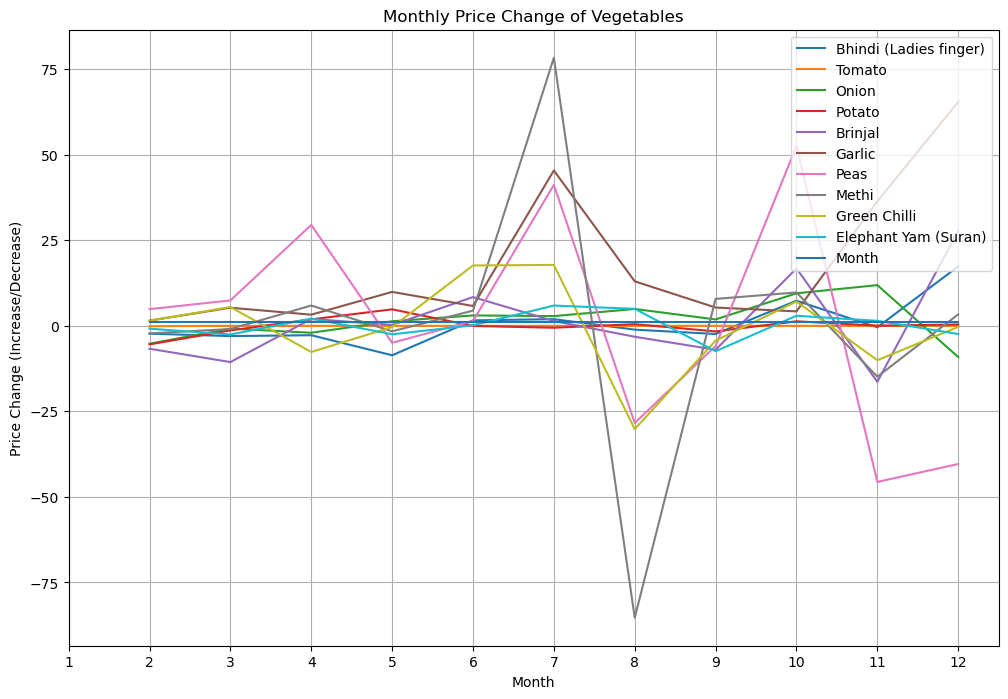

       Bhindi (Ladies finger)    Tomato      Onion    Potato    Brinjal  \
Month                                                                     
1                         NaN       NaN        NaN       NaN        NaN   
2                   -2.298611 -0.111111  -5.229167 -5.430556  -6.694444   
3                   -2.998397  0.000000  -0.802885 -1.342949 -10.596154   
4                   -2.751603  0.000000  -2.030449  1.884615   2.012821   
5                   -8.609167  0.000000   1.325833  4.820000   0.233333   
6                    1.600000  0.000000   3.040000 -0.040000   8.400000   
7                    1.940000  0.000000   2.840000 -0.560000   1.400000   
8                   -1.120000  0.000000   4.920000  0.480000  -3.200000   
9                   -2.387826  0.000000   1.867826 -1.634783  -7.000000   
10                   7.328595  0.000000   9.498328  1.319398  16.769231   
11                  -0.437291  0.000000  11.892977  0.028428 -16.377926   
12                  17.36

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('prices.csv')

# Convert the 'Price Dates' column to datetime format
df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')

# Extract the month from the 'Price Dates' column
df['Month'] = df['Price Dates'].dt.month

# Remove the 'Price Dates' column as we only want to analyze vegetable prices
df_vegetables = df.drop(columns=['Price Dates'])

# Group the data by month and calculate the average price for each vegetable
monthly_avg_prices = df_vegetables.groupby(df['Month']).mean()

# Calculate the month-to-month price change for each vegetable
monthly_price_changes = monthly_avg_prices.diff()

# Plot the monthly price changes for each vegetable
plt.figure(figsize=(12, 8))

# Plot the price change for each vegetable
for vegetable in monthly_price_changes.columns:
    plt.plot(monthly_price_changes.index, monthly_price_changes[vegetable], label=vegetable)

# Add labels and title to the plot
plt.title('Monthly Price Change of Vegetables')
plt.xlabel('Month')
plt.ylabel('Price Change (Increase/Decrease)')
plt.xticks(range(1, 13))  # To show months from 1 to 12
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Print out the monthly price changes for each vegetable to observe trends
print(monthly_price_changes)


Methi is a vegetable that has a sharp increase in month 7(July) and decrease in month 8(August) in price.

# Can we identify any anormalies or outliers in the price data?

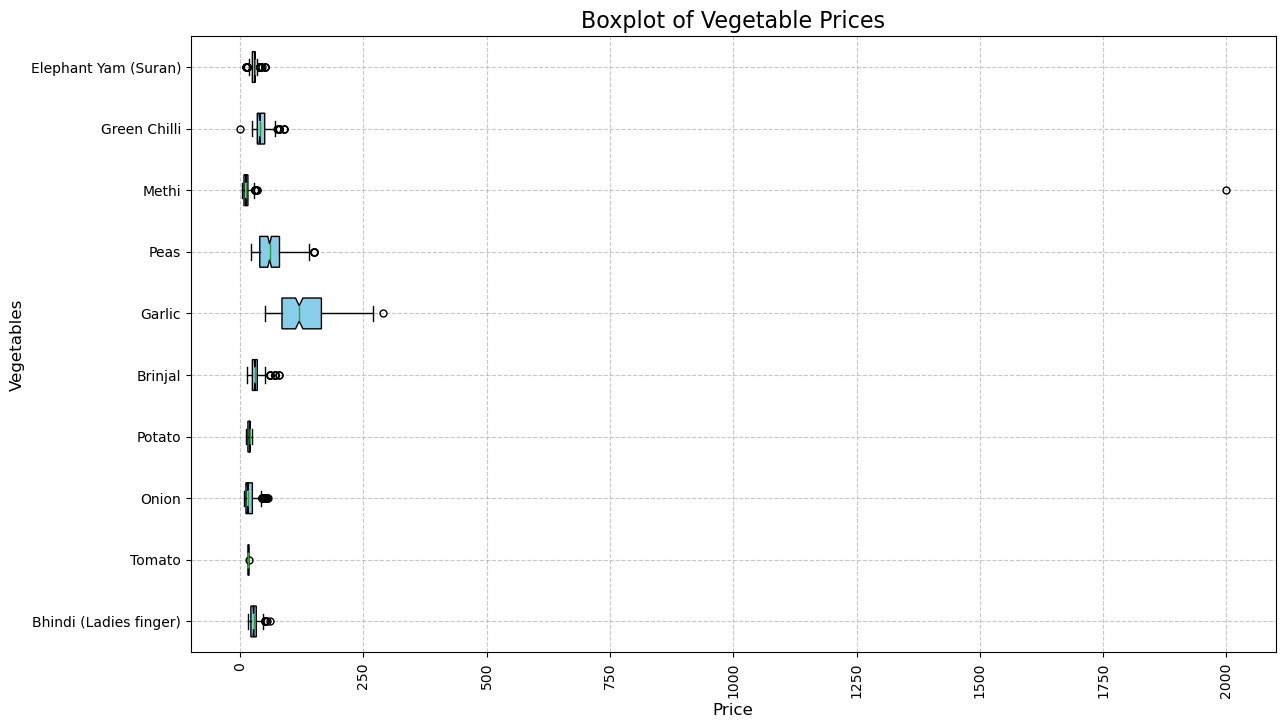

Outliers based on Z-score method:
Outlier detected for Tomato on Date 2023-01-01 00:00:00: Price = 18
Outlier detected for Brinjal on Date 2023-01-25 00:00:00: Price = 70
Outlier detected for Green Chilli on Date 2023-04-14 00:00:00: Price = 0.13
Outlier detected for Elephant Yam (Suran) on Date 2023-06-02 00:00:00: Price = 50
Outlier detected for Green Chilli on Date 2023-07-05 00:00:00: Price = 90.0
Outlier detected for Green Chilli on Date 2023-07-07 00:00:00: Price = 90.0
Outlier detected for Methi on Date 2023-07-11 00:00:00: Price = 2000
Outlier detected for Green Chilli on Date 2023-07-19 00:00:00: Price = 90.0
Outlier detected for Elephant Yam (Suran) on Date 2023-07-24 00:00:00: Price = 50
Outlier detected for Elephant Yam (Suran) on Date 2023-08-24 00:00:00: Price = 50
Outlier detected for Elephant Yam (Suran) on Date 2023-10-08 00:00:00: Price = 50
Outlier detected for Onion on Date 2023-10-29 00:00:00: Price = 57.0
Outlier detected for Bhindi (Ladies finger) on Date 2023-12

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('prices.csv')

# Convert the 'Price Dates' column to datetime format
df['Price Dates'] = pd.to_datetime(df['Price Dates'], format='%d-%m-%Y')

# Remove the 'Price Dates' column as we only want to analyze vegetable prices
df_vegetables = df.drop(columns=['Price Dates'])

# Calculate Z-scores to identify outliers
from scipy.stats import zscore

# Calculate the Z-scores for each vegetable
z_scores = np.abs(zscore(df_vegetables))

# Identify outliers: Z-score > 3
outliers_zscore = (z_scores > 3)

# Calculate IQR to identify outliers
Q1 = df_vegetables.quantile(0.25)
Q3 = df_vegetables.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers: values outside of Q1 - 1.5*IQR or Q3 + 1.5*IQR
outliers_iqr = ((df_vegetables < (Q1 - 1.5 * IQR)) | (df_vegetables > (Q3 + 1.5 * IQR)))

# Plot boxplots for each vegetable to visually check for outliers
plt.figure(figsize=(14, 8))
df_vegetables.boxplot(grid=False, patch_artist=True, notch=True, vert=0,
                      boxprops=dict(facecolor='skyblue', color='black'),
                      whiskerprops=dict(color='black'),
                      capprops=dict(color='black'),
                      flierprops=dict(marker='o', color='red', markersize=5))
plt.title('Boxplot of Vegetable Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Vegetables', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels to make them more readable
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print out the rows where outliers are detected based on Z-score or IQR
print("Outliers based on Z-score method:")
outliers_zscore_indices = np.where(outliers_zscore)
for i, (row, col) in enumerate(zip(outliers_zscore_indices[0], outliers_zscore_indices[1])):
    print(f"Outlier detected for {df_vegetables.columns[col]} on Date {df['Price Dates'].iloc[row]}: Price = {df_vegetables.iloc[row, col]}")

print("\nOutliers based on IQR method:")
outliers_iqr_indices = np.where(outliers_iqr)
for i, (row, col) in enumerate(zip(outliers_iqr_indices[0], outliers_iqr_indices[1])):
    print(f"Outlier detected for {df_vegetables.columns[col]} on Date {df['Price Dates'].iloc[row]}: Price = {df_vegetables.iloc[row, col]}")


# creating a bar chart of the 5 most expensive and most cheapest vegetables

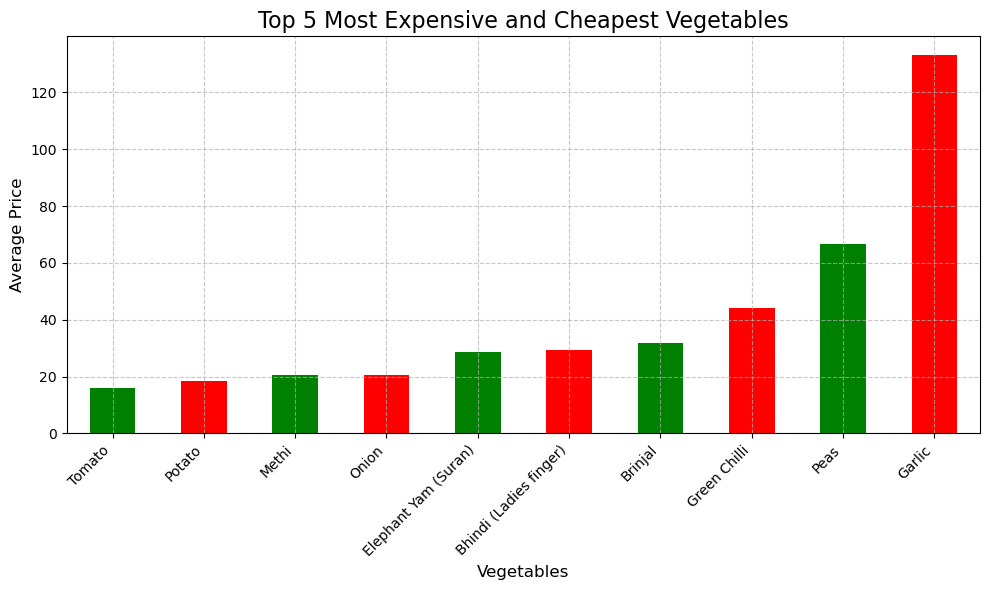

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('prices.csv')

# Remove the 'Price Dates' column as we only want to analyze vegetable prices
df_vegetables = df.drop(columns=['Price Dates'])

# Calculate the average price for each vegetable
average_prices = df_vegetables.mean()

# Sort the vegetables by price (most expensive and cheapest)
sorted_avg_prices = average_prices.sort_values()

# Get the top 5 most expensive and cheapest vegetables
top_5_cheapest = sorted_avg_prices.head(5)
top_5_expensive = sorted_avg_prices.tail(5)

# Combine the two dataframes to show both cheapest and expensive vegetables
combined_top_10 = pd.concat([top_5_cheapest, top_5_expensive])

# Plot the bar chart
plt.figure(figsize=(10, 6))
combined_top_10.plot(kind='bar', color=['green', 'red'])
plt.title('Top 5 Most Expensive and Cheapest Vegetables', fontsize=16)
plt.xlabel('Vegetables', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Most cheapest vegetable is a tomato and the most expensive vegetable is a garlic

# Which vegetables are most/least frequently sold?

In [77]:
# Load the dataset
df = pd.read_csv('prices.csv')

# Remove the 'Price Dates' column to only focus on vegetable prices
df_vegetables = df.drop(columns=['Price Dates'])

# Count the number of non-null values (frequencies) for each vegetable
vegetable_frequencies = df_vegetables.count()

# Sort the vegetables by frequency (most frequent first)
sorted_frequencies = vegetable_frequencies.sort_values()

# Get the top 5 most frequent and least frequent vegetables
most_frequent = sorted_frequencies.tail(5)
least_frequent = sorted_frequencies.head(5)

# Display the results
print("Top 5 Most Frequently Sold Vegetables:")
print(most_frequent)

print("\nTop 5 Least Frequently Sold Vegetables:")
print(least_frequent)


Top 5 Most Frequently Sold Vegetables:
Garlic                  287
Peas                    287
Methi                   287
Green Chilli            287
Elephant Yam (Suran)    287
dtype: int64

Top 5 Least Frequently Sold Vegetables:
Bhindi (Ladies finger)    287
Tomato                    287
Onion                     287
Potato                    287
Brinjal                   287
dtype: int64


# Summary statistics for each vegetable

In [80]:
# Load the dataset
df = pd.read_csv('prices.csv')

# Remove the 'Price Dates' column to only focus on vegetable prices
df_vegetables = df.drop(columns=['Price Dates'])

# Get the summary statistics for each vegetable
summary_stats = df_vegetables.describe()

# Display the summary statistics
print(summary_stats)


       Bhindi (Ladies finger)      Tomato       Onion      Potato     Brinjal  \
count              287.000000  287.000000  287.000000  287.000000  287.000000   
mean                29.444251   16.006969   20.649826   18.585366   31.655052   
std                  8.124815    0.118056   11.711204    2.726238   11.725421   
min                 17.000000   16.000000    8.000000   12.000000   14.000000   
25%                 22.000000   16.000000   12.000000   16.000000   25.000000   
50%                 27.500000   16.000000   16.000000   20.000000   30.000000   
75%                 33.000000   16.000000   25.000000   20.000000   35.000000   
max                 60.000000   18.000000   57.000000   24.000000   80.000000   

           Garlic        Peas        Methi  Green Chilli  Elephant Yam (Suran)  
count  287.000000  287.000000   287.000000    287.000000            287.000000  
mean   133.101045   66.658537    20.383275     44.122404             28.797909  
std     60.078331   33.3024